# <span style="color:darkblue"> Lecture 13: Logistic Regression for Classification
 </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries </span>


In [65]:
# The "pandas" library is used for processing datasets
# The "numpy" is for numeric observations and random numbers
# The "matplotlib.pyplot" library is for creating graphs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# We will use the "sklearn" package

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Import stats models


# This is used to create data matrices
import patsy

<font size = "5" >

### <span style="color:darkblue">  II. Example: Diffusion of microfinance </span>

Banerjee et al. (2013) explored the effects of a marketing <br>
campaign in rural villages in Karnataka, India, on the   <br>
probability of requesting a microfinance loan.

https://www.science.org/doi/10.1126/science.1236498

We will use their data today.

<font size = "5">

The outcome variable <br>

$\quad Y_i = \text{RequestLoan}_i $

<font size = "5">

The predictor vector:

$\quad X_i = \begin{bmatrix} 1 \\ \text{ReceivedInfo}_i \\ \text{OwnsHouse}_i \\ \text{HomeNumRooms}_i \end{bmatrix} $



# <span style="color:darkblue"> III. Prepare Data </span>


<font size = "5">

Read microfinance data

In [66]:
dataset = pd.read_csv("data_raw/microfinance_data.csv")

<font size = "5">

Create "y" and "X" matrices from a formula. This allows for:

- Interactions
- Factors
- Polynomials

In [67]:
y, X = \
    patsy.dmatrices('request_loan ~ received_info + owns_house + home_numrooms',
                       dataset)
y = np.ravel(y)

<font size = "5">

Split the data into training and test

<font size = "3">

- "test_size" is a number between 0 and 1 that control the relative <br>
proportions of the training and test datasets.
- "random_state" is a seed that ensures that the training and test datasets <br>
can be replicated

In [68]:
X_train, X_test, y_train, y_test = train_test_split(
           X, y, test_size=0.5, random_state=42)

# <span style="color:darkblue"> IV. Fit model and evaluate classification accuracy </span>


<font size = "5">

Fit model on data using "Sk-learn"

In [69]:
model = LogisticRegression().fit(X_train,y_train)
model

LogisticRegression()

<font size = "5">

Obtain vector of predicted probabilites on test set

Text(0.5, 1.0, 'Predicted Probabilities on Test Set')

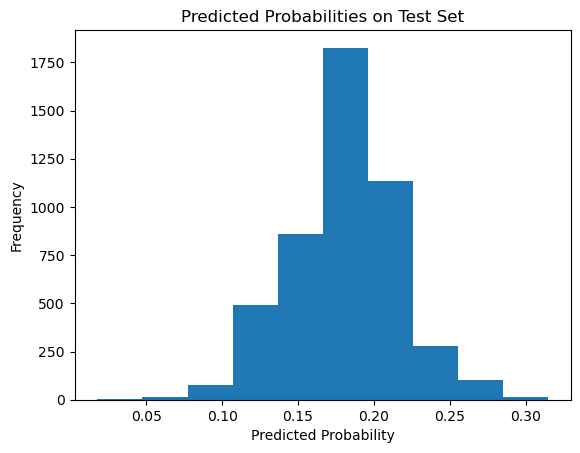

In [70]:
# Obtain predicted probabilities
mat_probabilities = pd.DataFrame(model.predict_proba(X_test))

# Obtain probabilites for the event 1 
# (This is the second column of "mat_probabilities")
vec_probabilities = mat_probabilities.iloc[:,1]

# Display results
plt.hist(x = vec_probabilities)
plt.xlabel("Predicted Probability")
plt.ylabel("Frequency")
plt.title("Predicted Probabilities on Test Set")

<font size = "5">

Classifying observations

- If probability is higher than 0.15 classify as 1
- Can change threshold

In [71]:
bins_y = [0,0.15, 1]
labels_y = [0,1]

predicted_labels = pd.cut(vec_probabilities,
                              bins = bins_y,
                              right = True,
                              labels = labels_y)

<font size = "5">

Obtain a confusion matrix

In [72]:
cm = confusion_matrix(y_test, predicted_labels)


cm = cm/len(y_test)

cm

array([[0.23192332, 0.5788706 ],
       [0.04625964, 0.14294645]])

<font size = "5">

Display confusion matrix

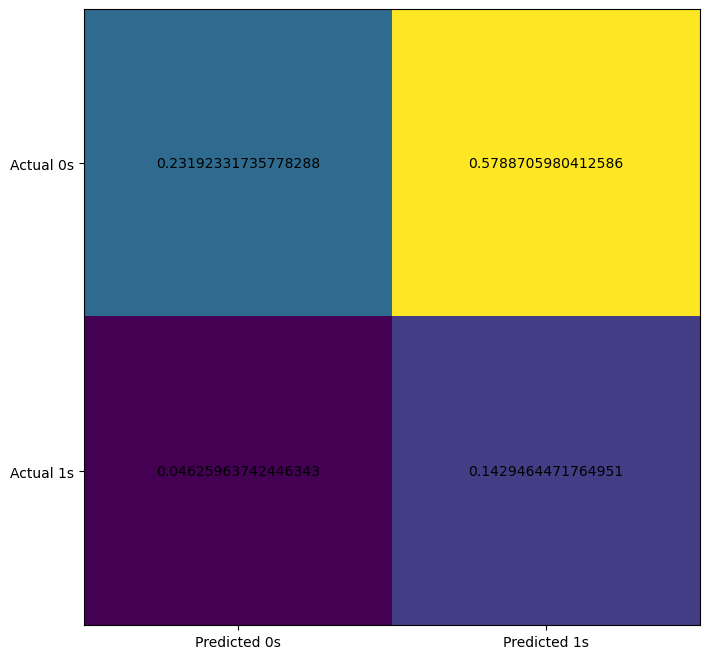

In [73]:

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()

# <span style="color:darkblue"> IV. Exercises </span>

<font size = "5">

Try it yourself

- Change the classification threshold
- How does this change the classification accuracy?


In [74]:
for threshold in np.arange(0, 1.1, 0.1): 

    predicted_labels = (vec_probabilities >= threshold).astype(int)
    cm = confusion_matrix(y_test, predicted_labels)/len(y_test)
    
    # Display the confusion matrix
    print(f"Threshold: {threshold}")
    #print(cm)
    print((cm[0,0]+cm[1,1] / cm.sum()))

Threshold: 0.0
0.18920608460095853
Threshold: 0.1
0.20400083350698062
Threshold: 0.2
0.7426547197332778
Threshold: 0.30000000000000004
0.8095436549281101
Threshold: 0.4
0.8107939153990414
Threshold: 0.5
0.8107939153990414
Threshold: 0.6000000000000001
0.8107939153990414
Threshold: 0.7000000000000001
0.8107939153990414
Threshold: 0.8
0.8107939153990414
Threshold: 0.9
0.8107939153990414
Threshold: 1.0
0.8107939153990414


[[0.81079392 0.        ]
 [0.18920608 0.        ]]
0.8107939153990414


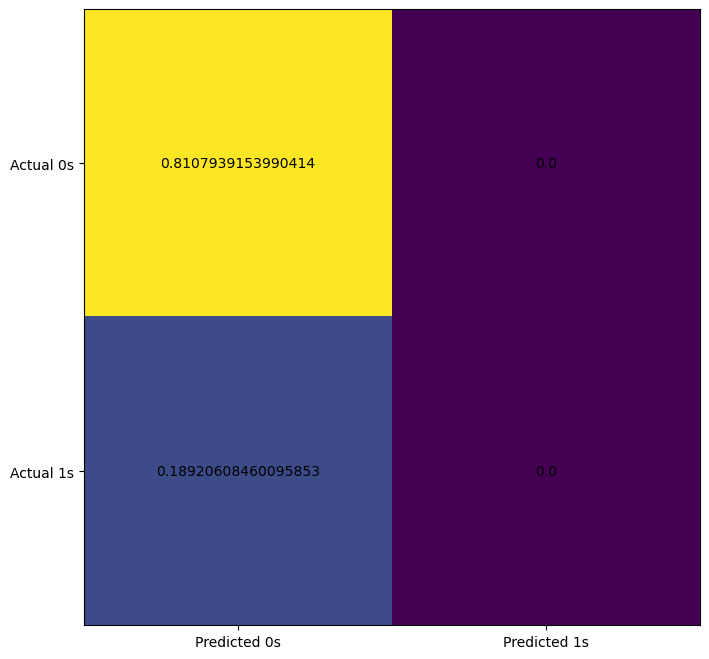

In [75]:

bins_y = [0, 0.9, 1]
labels_y = [0, 1]


predicted_labels = pd.cut(vec_probabilities,
                              bins = bins_y,
                              right = True,
                              labels = labels_y)

cm = confusion_matrix(y_test, predicted_labels) / len(y_test)
cm
print(cm)

print(cm[0,0]+cm[1,1] / cm.sum())


fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center')
plt.show()



<font size = "5">

Try it yourself

- Add interactions between "Own rooms" and other independent variables
- Does this improve the classification accuracy?
 


In [76]:
# Write your own code




<font size = "5">